In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
testDataDir = "data/train.csv"
df = pd.read_csv(testDataDir)
df.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [10]:
df.describe()

id           Age        Height        Weight          FCVC  \
count  20758.00000  20758.000000  20758.000000  20758.000000  20758.000000   
mean   10378.50000     23.841804      1.700245     87.887768      2.445908   
std     5992.46278      5.688072      0.087312     26.379443      0.533218   
min        0.00000     14.000000      1.450000     39.000000      1.000000   
25%     5189.25000     20.000000      1.631856     66.000000      2.000000   
50%    10378.50000     22.815416      1.700000     84.064875      2.393837   
75%    15567.75000     26.000000      1.762887    111.600553      3.000000   
max    20757.00000     61.000000      1.975663    165.057269      3.000000   

                NCP          CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  20758.000000  
mean       2.761332      2.029418      0.981747      0.616756  
std        0.705375      0.608467      0.838302      0.602113  
min        1.000000      1.000000      0.000000      0.000000  
25%        3.000000      1.792022      0.008013      0.000000  
50%        3.000000      2.000000      1.000000      0.573887  
75%        3.000000      2.549617      1.587406      1.000000  
max        4.000000      3.000000      3.000000      2.000000

In [11]:
df.shape

(20758, 18)

In [12]:
df.drop('id', inplace=True, axis=1)

In [13]:
df.shape

(20758, 17)

# **Initial Data Exploration and Visualization**



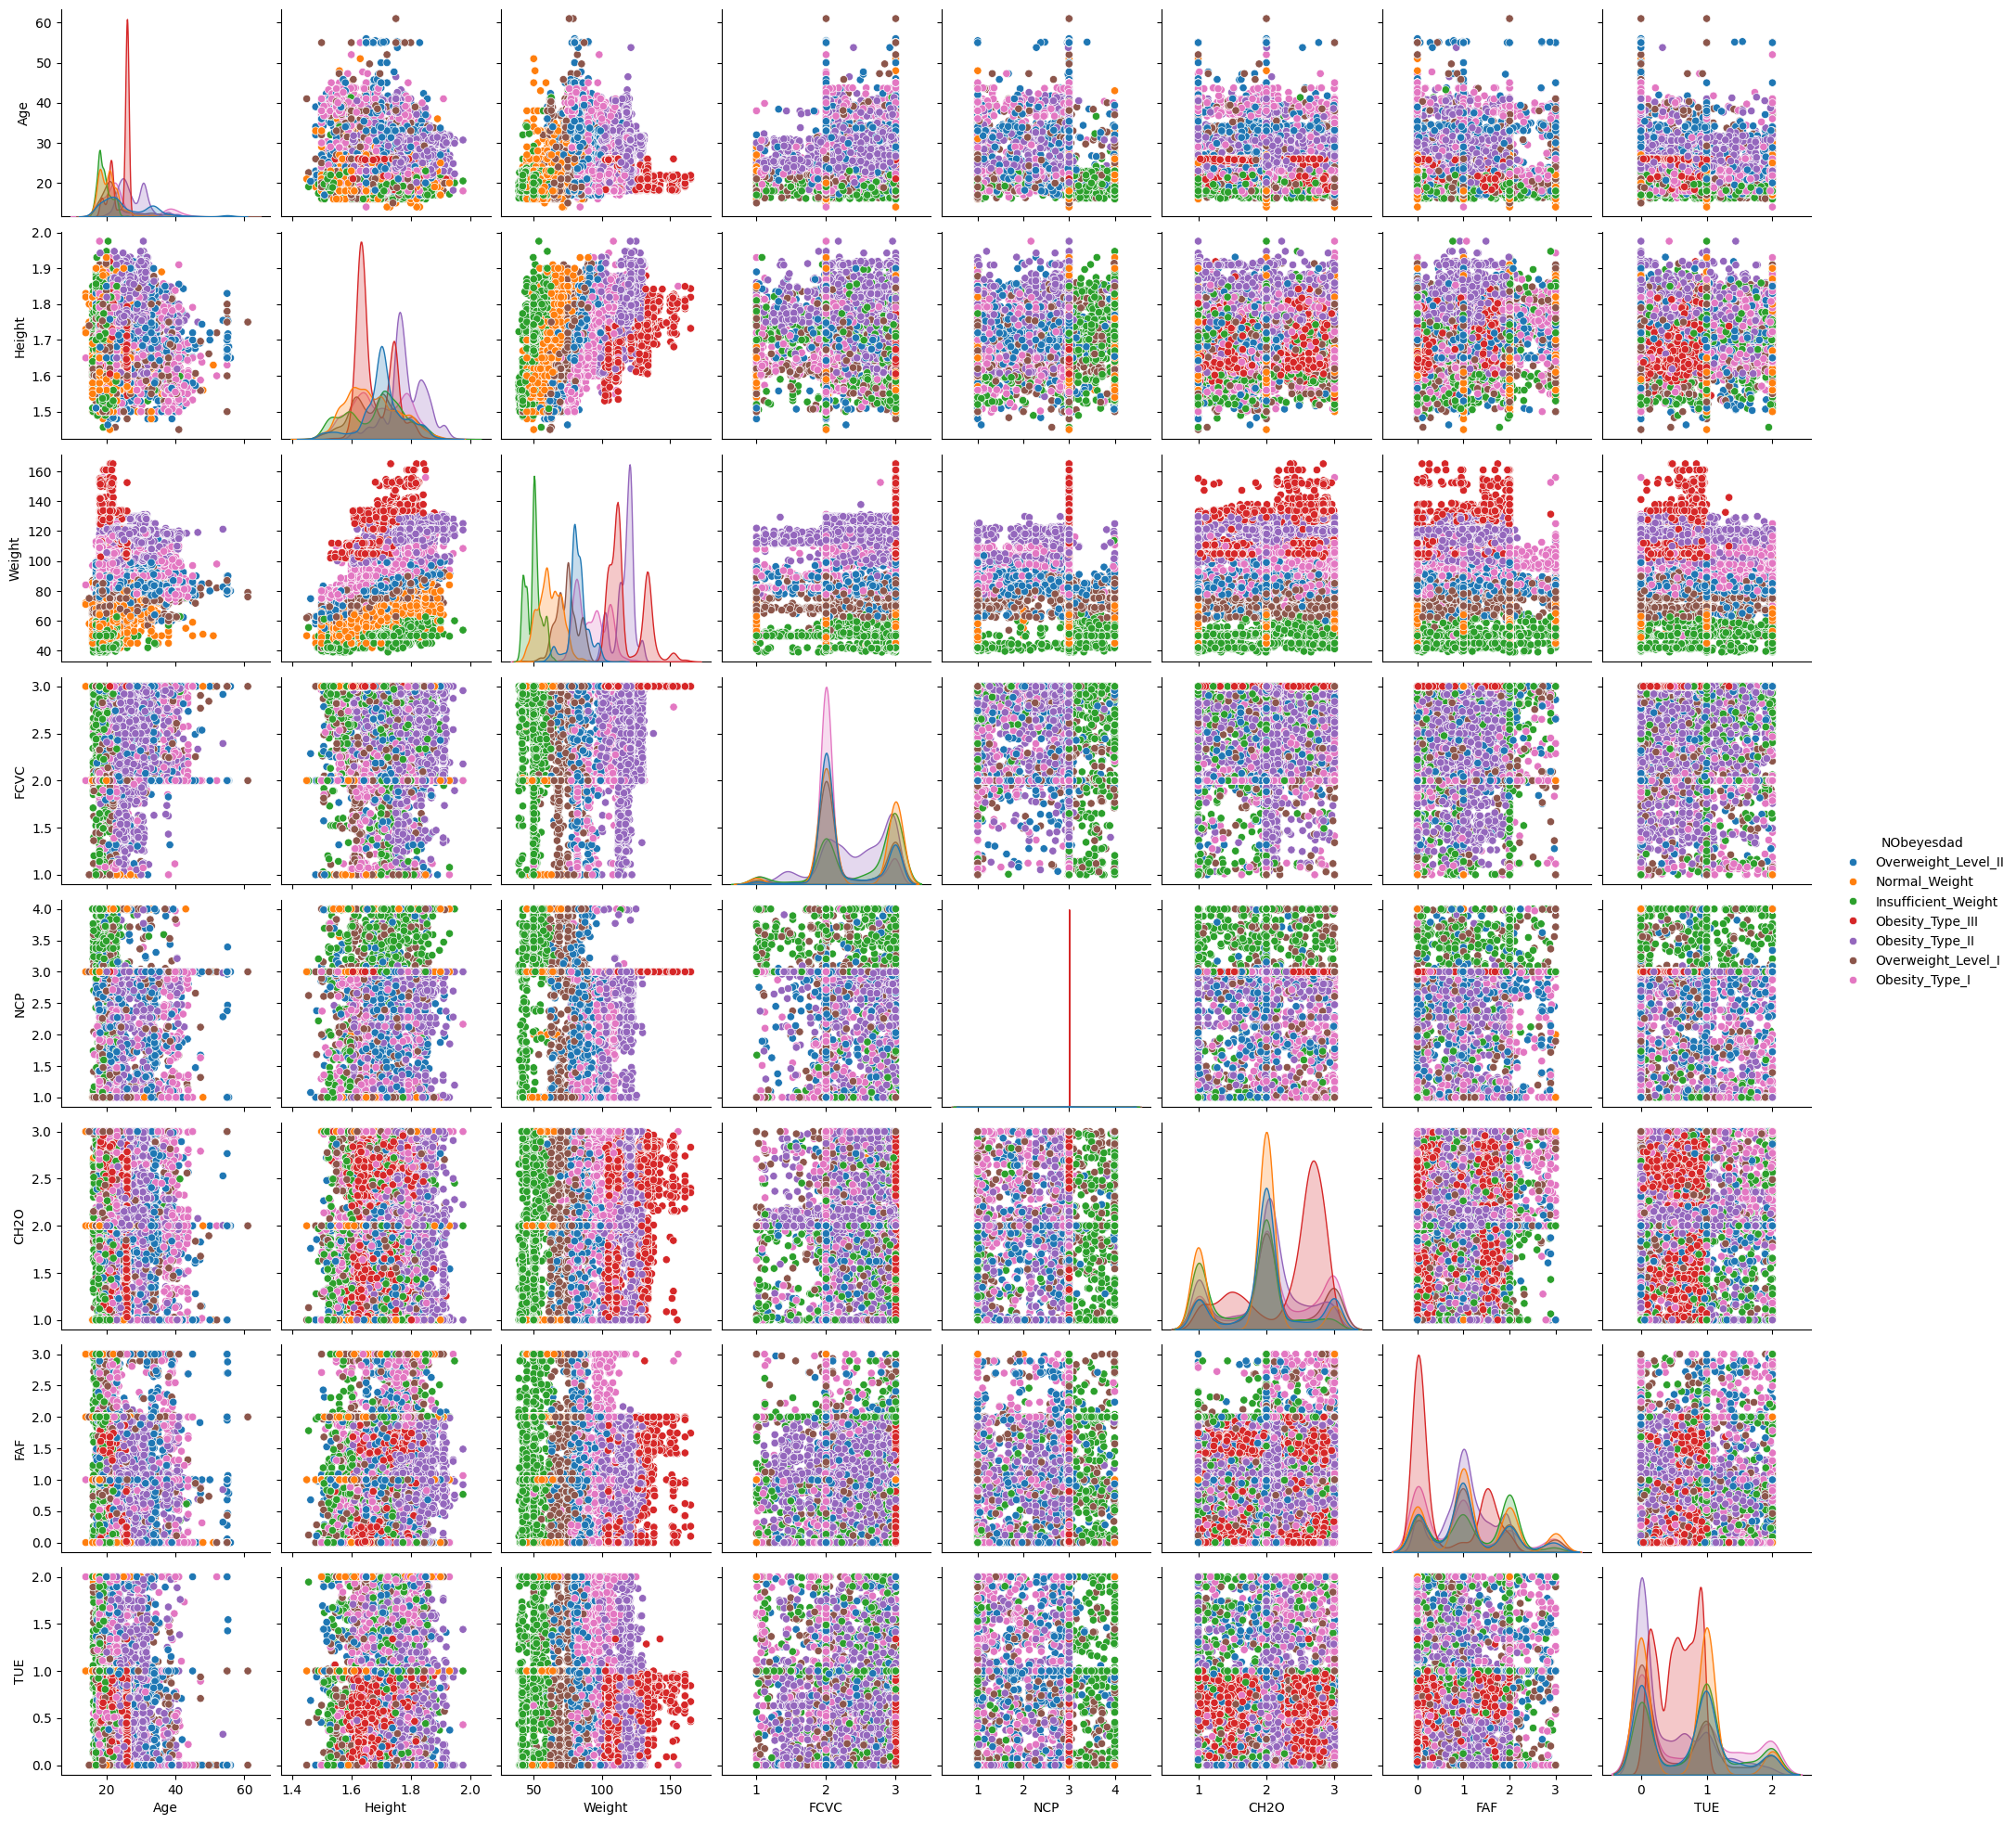

In [14]:
sns.pairplot(data=df, hue='NObeyesdad')

<Axes: xlabel='Height', ylabel='Weight'>

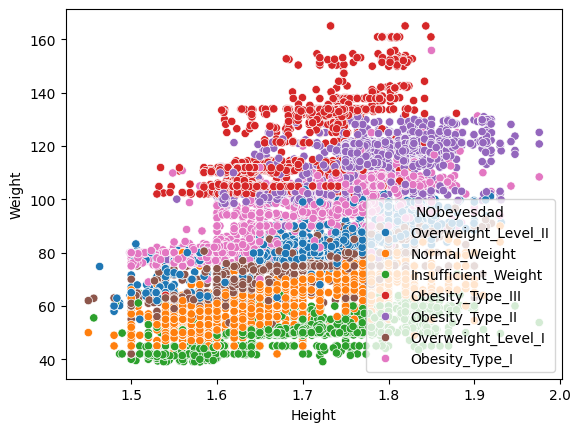

In [15]:
sns.scatterplot(x=df['Height'], y=df['Weight'], hue=df['NObeyesdad'])

We can see that height and weight give a reasonably good separation of output classes, so we can try and build an initial, primitive model using just Age, Height, and Weight as the predictor variables.

In [ ]:
#Creating a sub-dataframe with only height and weight as predictors
df_sub = df.drop(['Gender', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'], axis=1)

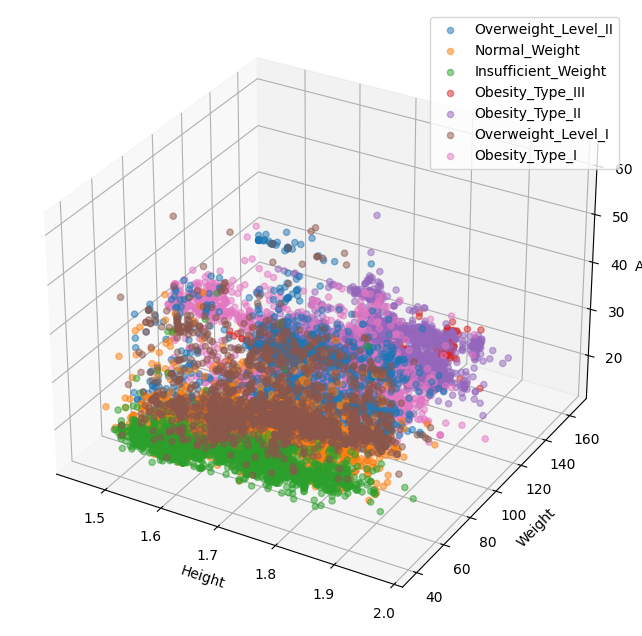

In [ ]:
#3d Scatterplot of height, weight and age

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
for label in df_sub['NObeyesdad'].unique():
  ax.scatter(
      df_sub[df_sub['NObeyesdad']==label]['Height'],
      df_sub[df_sub['NObeyesdad']==label]['Weight'],
      df_sub[df_sub['NObeyesdad']==label]['Age'],
      label = label,
      alpha=0.5
      )

ax.set_xlabel("Height")
ax.set_ylabel("Weight")
ax.set_zlabel("Age")

ax.legend()
plt.show()

In [ ]:
#Checking for Missing Data
df_sub.isnull().sum()

Age           0
Height        0
Weight        0
NObeyesdad    0
dtype: int64

In [ ]:
#Encoding output values from text labels to numbers.
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df_sub['NObeyesdad'] = enc.fit_transform(df_sub['NObeyesdad'])
df_sub.head()

Age    Height      Weight  NObeyesdad
0  24.443011  1.699998   81.669950           6
1  18.000000  1.560000   57.000000           1
2  18.000000  1.711460   50.165754           0
3  20.952737  1.710730  131.274851           4
4  31.641081  1.914186   93.798055           6

We will try and fit two models - K Nearest Neighbours and Logistic Regression

In [ ]:
#Perform Train-test split
from sklearn.model_selection import train_test_split

X = df_sub.drop('NObeyesdad', axis=1)
y = df_sub['NObeyesdad']

In [ ]:
#Scaling The data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
X_train.shape, X_test.shape

((16606, 3), (4152, 3))

In [ ]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression()
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)

Accuracy Score: 0.8234585741811176
Balanced Accuracy Score: 0.8113867804679019


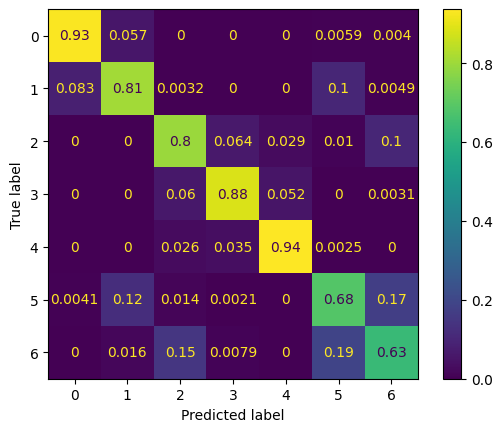

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, preds, normalize='true')
disp = ConfusionMatrixDisplay(cm)
disp.plot()
print("Accuracy Score:", accuracy_score(y_test, preds))
print("Balanced Accuracy Score:", balanced_accuracy_score(y_test, preds))

[]

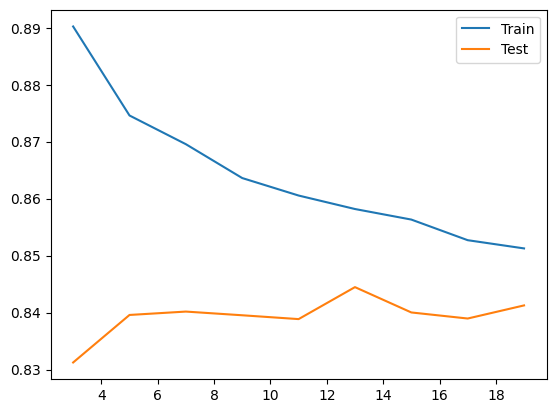

In [ ]:
#Trying to find the optimal value of n for KNN Classifier

from sklearn.neighbors import KNeighborsClassifier

n_neighbours_list = np.arange(3, 21, 2)
training_acc = []
testing_acc = []

for n in n_neighbours_list:
  classifier = KNeighborsClassifier(n_neighbors=n)
  classifier.fit(X_train, y_train)
  train_preds = classifier.predict(X_train)
  test_preds = classifier.predict(X_test)

  training_acc.append(balanced_accuracy_score(y_train, train_preds))
  testing_acc.append(balanced_accuracy_score(y_test, test_preds))

plt.plot(n_neighbours_list, training_acc, label='Train')
plt.plot(n_neighbours_list, testing_acc, label='Test')
plt.legend()
plt.plot()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=13)
classifier.fit(X_train, y_train)
y_preds = classifier.predict(X_test)

Accuracy Score: 0.8571772639691715
Balanced Accuracy Score: 0.8444657236954889


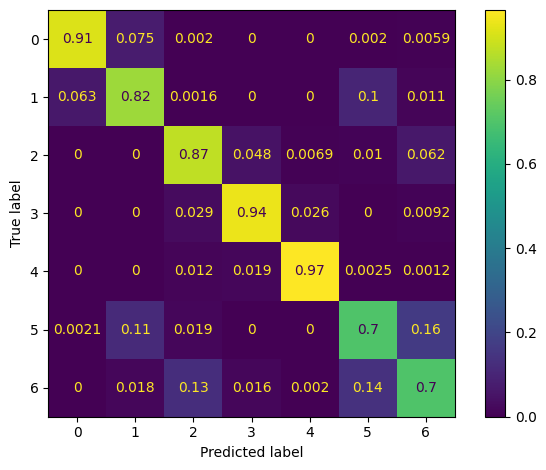

In [ ]:
print("Accuracy Score:", accuracy_score(y_test, y_preds))
print("Balanced Accuracy Score:", balanced_accuracy_score(y_test, y_preds))
cm = confusion_matrix(y_test, y_preds, normalize='true')
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.tight_layout()
plt.show()

Now, we can try and focus on categorical variables in the data to see how they influence the output class.

In [ ]:
df.head()

Gender        Age    Height      Weight family_history_with_overweight  \
0    Male  24.443011  1.699998   81.669950                            yes   
1  Female  18.000000  1.560000   57.000000                            yes   
2  Female  18.000000  1.711460   50.165754                            yes   
3  Female  20.952737  1.710730  131.274851                            yes   
4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [ ]:
cat_df = df.drop(['Gender', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], axis=1)

In [ ]:
cat_df.head()

family_history_with_overweight FAVC        CAEC SMOKE SCC       CALC  \
0                            yes  yes   Sometimes    no  no  Sometimes   
1                            yes  yes  Frequently    no  no         no   
2                            yes  yes   Sometimes    no  no         no   
3                            yes  yes   Sometimes    no  no  Sometimes   
4                            yes  yes   Sometimes    no  no  Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation  Overweight_Level_II  
1             Automobile        Normal_Weight  
2  Public_Transportation  Insufficient_Weight  
3  Public_Transportation     Obesity_Type_III  
4  Public_Transportation  Overweight_Level_II

In [ ]:
X = cat_df.drop('NObeyesdad', axis=1)
y = cat_df['NObeyesdad']

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# ohe = OneHotEncoder(drop='first')
le_y = LabelEncoder()
le_x = LabelEncoder()

y = le_y.fit_transform(y)
for col in X.columns:
  X[col] = le_x.fit_transform(X[col])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

We can try and fit models such as Decision Trees, Random Forests etc. to this data.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
preds = dtree.predict(X_test)

Accuracy Score: 0.470616570327553
Balanced Accuracy Score: 0.43994799279734753


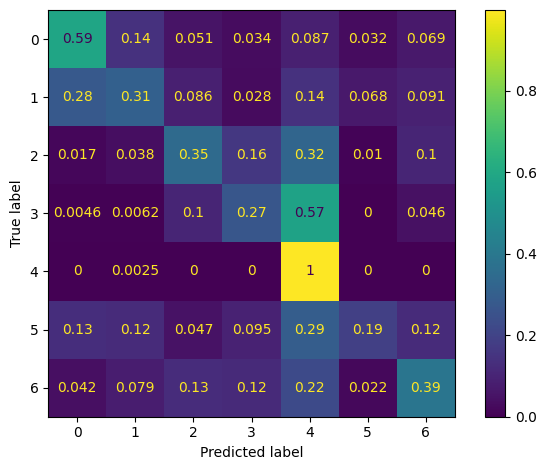

In [ ]:
print("Accuracy Score:", accuracy_score(y_test, preds))
print("Balanced Accuracy Score:", balanced_accuracy_score(y_test, preds))
cm = confusion_matrix(y_test, preds, normalize='true')
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.tight_layout()
plt.show()

[]

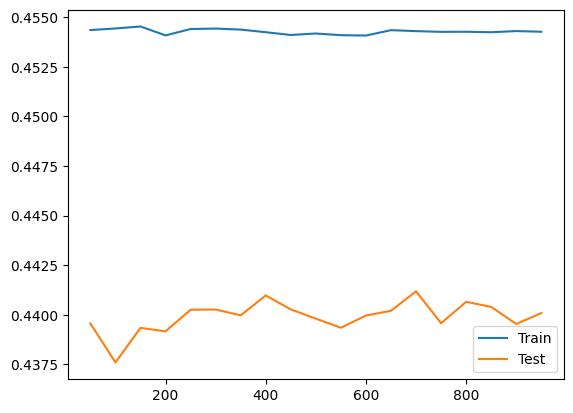

In [ ]:
from sklearn.ensemble import RandomForestClassifier

n_estimator_list = np.arange(50,1000,50)

training_acc = []
testing_acc = []

for n in n_estimator_list:
  rforest = RandomForestClassifier(n_estimators=n)
  rforest.fit(X_train, y_train)
  train_preds = rforest.predict(X_train)
  test_preds = rforest.predict(X_test)

  training_acc.append(balanced_accuracy_score(y_train, train_preds))
  testing_acc.append(balanced_accuracy_score(y_test, test_preds))

plt.plot(n_estimator_list, training_acc, label='Train')
plt.plot(n_estimator_list, testing_acc, label='Test')
plt.legend()
plt.plot()

We can see that using only categorical variables is not a good solution, hence we can try and use all continuous variables to try and build the final model.

In [ ]:
df_cont = df.drop(['family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'], axis=1)

df_cont.head()

Gender        Age    Height      Weight           NObeyesdad
0    Male  24.443011  1.699998   81.669950  Overweight_Level_II
1  Female  18.000000  1.560000   57.000000        Normal_Weight
2  Female  18.000000  1.711460   50.165754  Insufficient_Weight
3  Female  20.952737  1.710730  131.274851     Obesity_Type_III
4    Male  31.641081  1.914186   93.798055  Overweight_Level_II

In [ ]:
X = df_cont.drop('NObeyesdad', axis=1)
y = df_cont['NObeyesdad']

In [ ]:
def encode(x, zero_label):
  if x == zero_label:
    return 0
  else:
    return 1

In [ ]:
labelEnc = LabelEncoder()
y = labelEnc.fit_transform(y)

X['Gender_Male'] = X['Gender'].apply(lambda x : encode(x, 'Female'))
X['Gender_Female'] = X['Gender'].apply(lambda x : encode(x, 'Male'))
X.drop('Gender', inplace=True, axis=1)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
reg = LogisticRegression(max_iter=10000)
reg.fit(X_train, y_train)
preds = reg.predict(X_test)

Accuracy Score: 0.8513969171483622
Balanced Accuracy Score: 0.8365924595611975


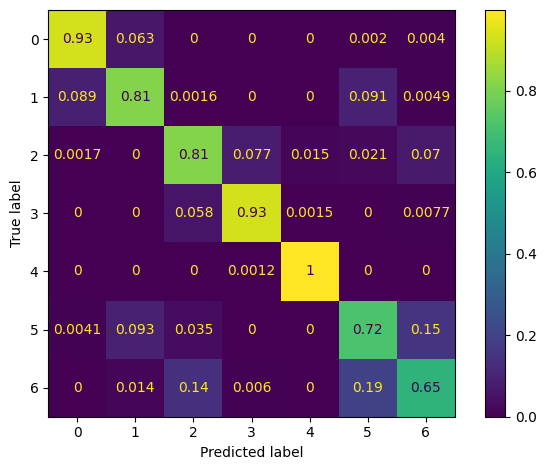

In [ ]:
print("Accuracy Score:", accuracy_score(y_test, preds))
print("Balanced Accuracy Score:", balanced_accuracy_score(y_test, preds))
cm = confusion_matrix(y_test, preds, normalize='true')
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.tight_layout()
plt.show()

[]

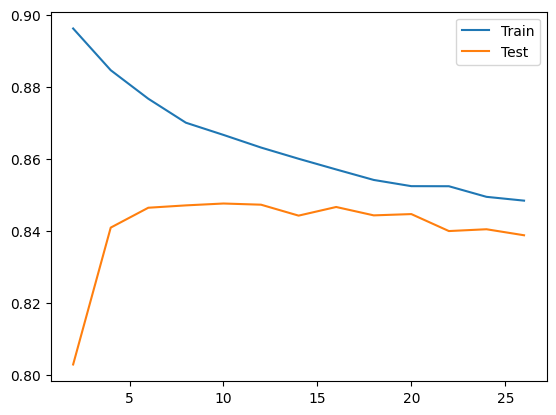

In [ ]:
n_neighbours_list = np.arange(2, 27, 2)
training_acc = []
testing_acc = []

for n in n_neighbours_list:
  classifier = KNeighborsClassifier(n_neighbors=n)
  classifier.fit(X_train, y_train)
  train_preds = classifier.predict(X_train)
  test_preds = classifier.predict(X_test)

  training_acc.append(balanced_accuracy_score(y_train, train_preds))
  testing_acc.append(balanced_accuracy_score(y_test, test_preds))

plt.plot(n_neighbours_list, training_acc, label='Train')
plt.plot(n_neighbours_list, testing_acc, label='Test')
plt.legend()
plt.plot()

[]

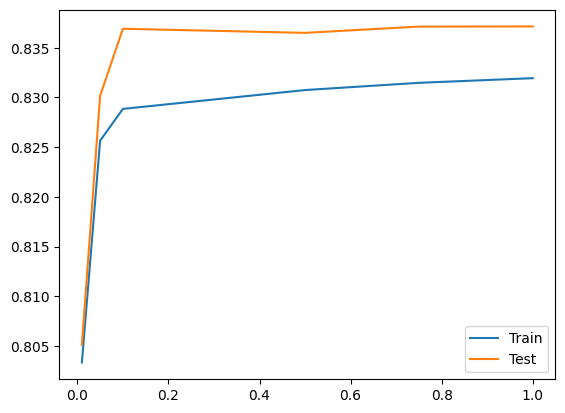

In [ ]:
from sklearn.svm import SVC

training_acc = []
testing_acc = []
c_val_list = [0.01, 0.05, 0.1, 0.5, 0.75, 1.0]

for c in c_val_list:
  svc = SVC(kernel='linear', C=c)
  svc.fit(X_train, y_train)
  train_preds = svc.predict(X_train)
  test_preds = svc.predict(X_test)

  training_acc.append(balanced_accuracy_score(y_train, train_preds))
  testing_acc.append(balanced_accuracy_score(y_test, test_preds))

plt.plot(c_val_list, training_acc, label='Train')
plt.plot(c_val_list, testing_acc, label='Test')
plt.legend()
plt.plot()

[]

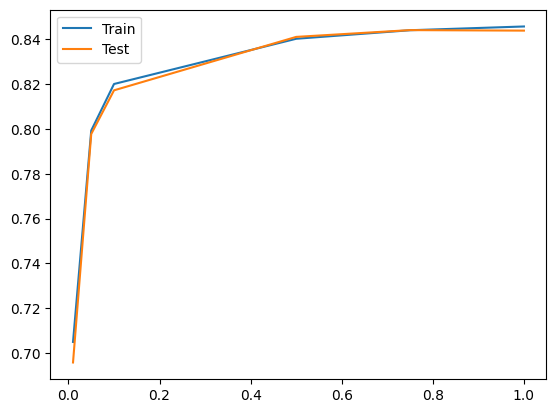

In [ ]:
from sklearn.svm import SVC

training_acc = []
testing_acc = []
c_val_list = [0.01, 0.05, 0.1, 0.5, 0.75, 1.0]

for c in c_val_list:
  svc = SVC(kernel='rbf', C=c)
  svc.fit(X_train, y_train)
  train_preds = svc.predict(X_train)
  test_preds = svc.predict(X_test)

  training_acc.append(balanced_accuracy_score(y_train, train_preds))
  testing_acc.append(balanced_accuracy_score(y_test, test_preds))

plt.plot(c_val_list, training_acc, label='Train')
plt.plot(c_val_list, testing_acc, label='Test')
plt.legend()
plt.plot()

In [ ]:
svc = SVC(kernel='rbf', C=1.0)
svc.fit(X_train, y_train)
preds = svc.predict(X_test)

Accuracy Score: 0.8586223506743738
Balanced Accuracy Score: 0.8438699673193798


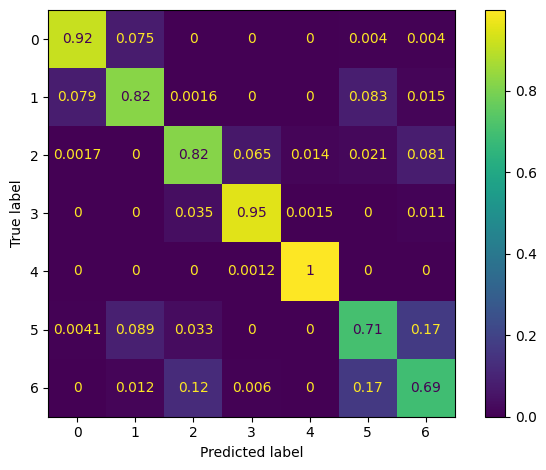

In [ ]:
print("Accuracy Score:", accuracy_score(y_test, preds))
print("Balanced Accuracy Score:", balanced_accuracy_score(y_test, preds))
cm = confusion_matrix(y_test, preds, normalize='true')
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.tight_layout()
plt.show()

# Using XGBoost

In [47]:
cols = ['Gender','family_history_with_overweight','FAVC','SMOKE','SCC']

df1 = pd.get_dummies(df, columns=cols, drop_first=True, dtype=int)
df1.head()

Age    Height      Weight      FCVC       NCP        CAEC      CH2O  \
0  24.443011  1.699998   81.669950  2.000000  2.983297   Sometimes  2.763573   
1  18.000000  1.560000   57.000000  2.000000  3.000000  Frequently  2.000000   
2  18.000000  1.711460   50.165754  1.880534  1.411685   Sometimes  1.910378   
3  20.952737  1.710730  131.274851  3.000000  3.000000   Sometimes  1.674061   
4  31.641081  1.914186   93.798055  2.679664  1.971472   Sometimes  1.979848   

        FAF       TUE       CALC                 MTRANS           NObeyesdad  \
0  0.000000  0.976473  Sometimes  Public_Transportation  Overweight_Level_II   
1  1.000000  1.000000         no             Automobile        Normal_Weight   
2  0.866045  1.673584         no  Public_Transportation  Insufficient_Weight   
3  1.467863  0.780199  Sometimes  Public_Transportation     Obesity_Type_III   
4  1.967973  0.931721  Sometimes  Public_Transportation  Overweight_Level_II   

   Gender_Male  family_history_with_overweight_yes  FAVC_yes  SMOKE_yes  \
0            1                                   1         1          0   
1            0                                   1         1          0   
2            0                                   1         1          0   
3            0                                   1         1          0   
4            1                                   1         1          0   

   SCC_yes  
0        0  
1        0  
2        0  
3        0  
4        0

In [48]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc_cols = ['CAEC','CALC','MTRANS']

for col in enc_cols:
  df1[col] = enc.fit_transform(df1[col])

df1.head()

Age    Height      Weight      FCVC       NCP  CAEC      CH2O  \
0  24.443011  1.699998   81.669950  2.000000  2.983297     2  2.763573   
1  18.000000  1.560000   57.000000  2.000000  3.000000     1  2.000000   
2  18.000000  1.711460   50.165754  1.880534  1.411685     2  1.910378   
3  20.952737  1.710730  131.274851  3.000000  3.000000     2  1.674061   
4  31.641081  1.914186   93.798055  2.679664  1.971472     2  1.979848   

        FAF       TUE  CALC  MTRANS           NObeyesdad  Gender_Male  \
0  0.000000  0.976473     1       3  Overweight_Level_II            1   
1  1.000000  1.000000     2       0        Normal_Weight            0   
2  0.866045  1.673584     2       3  Insufficient_Weight            0   
3  1.467863  0.780199     1       3     Obesity_Type_III            0   
4  1.967973  0.931721     1       3  Overweight_Level_II            1   

   family_history_with_overweight_yes  FAVC_yes  SMOKE_yes  SCC_yes  
0                                   1         1          0        0  
1                                   1         1          0        0  
2                                   1         1          0        0  
3                                   1         1          0        0  
4                                   1         1          0        0

In [49]:
op_enc = LabelEncoder()
df1['NObeyesdad'] = op_enc.fit_transform(df1['NObeyesdad'])

In [50]:
from sklearn.preprocessing import PowerTransformer

X = df1.drop('NObeyesdad', axis=1)
y = df1['NObeyesdad']

trans = PowerTransformer(method='yeo-johnson')
X = trans.fit_transform(X)

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [29]:
!pip install xgboost

In [38]:
from xgboost import XGBClassifier
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

[]

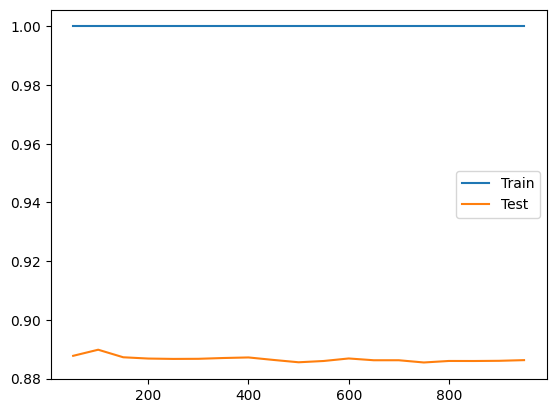

In [34]:
n_estimator_list = np.arange(50,1000,50)

training_acc = []
testing_acc = []

for n in n_estimator_list:
  xgb = XGBClassifier(n_estimators=n, max_depth=20)
  xgb.fit(X_train, y_train)
  train_preds = xgb.predict(X_train)
  test_preds = xgb.predict(X_test)

  training_acc.append(balanced_accuracy_score(y_train, train_preds))
  testing_acc.append(balanced_accuracy_score(y_test, test_preds))

plt.plot(n_estimator_list, training_acc, label='Train')
plt.plot(n_estimator_list, testing_acc, label='Test')
plt.legend()
plt.plot()

Accuracy Score: 0.9036608863198459
Balanced Accuracy Score: 0.8936529289039125


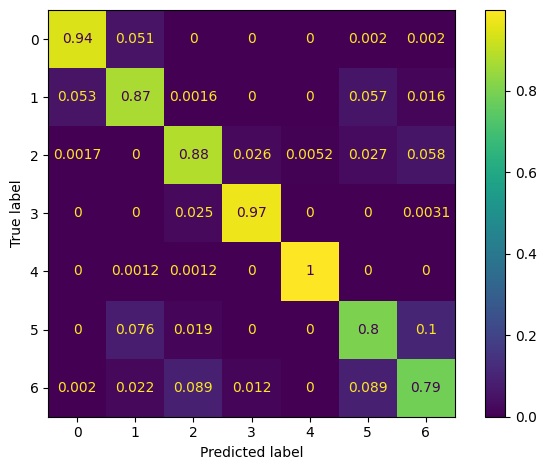

In [52]:
xgb = XGBClassifier(n_estimators=100, max_depth=20)
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, preds))
print("Balanced Accuracy Score:", balanced_accuracy_score(y_test, preds))
cm = confusion_matrix(y_test, preds, normalize='true')
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.tight_layout()
plt.show()

# We have our Best model (XGBoost), now we can make predictions on the test data

In [42]:
testDir = "data/test.csv"
test = pd.read_csv(testDir)
test.head()

id  Gender        Age    Height      Weight  \
0  20758    Male  26.899886  1.848294  120.644178   
1  20759  Female  21.000000  1.600000   66.000000   
2  20760  Female  26.000000  1.643355  111.600553   
3  20761    Male  20.979254  1.553127  103.669116   
4  20762  Female  26.000000  1.627396  104.835346   

  family_history_with_overweight FAVC      FCVC       NCP       CAEC SMOKE  \
0                            yes  yes  2.938616  3.000000  Sometimes    no   
1                            yes  yes  2.000000  1.000000  Sometimes    no   
2                            yes  yes  3.000000  3.000000  Sometimes    no   
3                            yes  yes  2.000000  2.977909  Sometimes    no   
4                            yes  yes  3.000000  3.000000  Sometimes    no   

       CH2O SCC       FAF       TUE       CALC                 MTRANS  
0  2.825629  no  0.855400  0.000000  Sometimes  Public_Transportation  
1  3.000000  no  1.000000  0.000000  Sometimes  Public_Transportation  
2  2.621877  no  0.000000  0.250502  Sometimes  Public_Transportation  
3  2.786417  no  0.094851  0.000000  Sometimes  Public_Transportation  
4  2.653531  no  0.000000  0.741069  Sometimes  Public_Transportation

In [43]:
cols = ['Gender','family_history_with_overweight','FAVC','SMOKE','SCC']

test = pd.get_dummies(test, columns=cols, drop_first=True, dtype=int)
test.head()
enc = LabelEncoder()
enc_cols = ['CAEC','CALC','MTRANS']

for col in enc_cols:
  test[col] = enc.fit_transform(test[col])

test.head()

id        Age    Height      Weight      FCVC       NCP  CAEC      CH2O  \
0  20758  26.899886  1.848294  120.644178  2.938616  3.000000     2  2.825629   
1  20759  21.000000  1.600000   66.000000  2.000000  1.000000     2  3.000000   
2  20760  26.000000  1.643355  111.600553  3.000000  3.000000     2  2.621877   
3  20761  20.979254  1.553127  103.669116  2.000000  2.977909     2  2.786417   
4  20762  26.000000  1.627396  104.835346  3.000000  3.000000     2  2.653531   

        FAF       TUE  CALC  MTRANS  Gender_Male  \
0  0.855400  0.000000     2       3            1   
1  1.000000  0.000000     2       3            0   
2  0.000000  0.250502     2       3            0   
3  0.094851  0.000000     2       3            1   
4  0.000000  0.741069     2       3            0   

   family_history_with_overweight_yes  FAVC_yes  SMOKE_yes  SCC_yes  
0                                   1         1          0        0  
1                                   1         1          0        0  
2                                   1         1          0        0  
3                                   1         1          0        0  
4                                   1         1          0        0

In [45]:
id = test['id']
test.drop('id', axis=1, inplace=True)

In [53]:
trans = PowerTransformer(method='yeo-johnson')
test = trans.fit_transform(test)

In [54]:
preds = xgb.predict(test)

In [59]:
preds = op_enc.inverse_transform(preds)

In [64]:
type(preds)

numpy.ndarray

In [65]:
preds = pd.Series(preds)

submission_df = pd.concat([id, preds], axis=1)
submission_df.head()

id                   0
0  20758     Obesity_Type_II
1  20759  Overweight_Level_I
2  20760    Obesity_Type_III
3  20761      Obesity_Type_I
4  20762    Obesity_Type_III

In [66]:
submission_df.to_csv('submission.csv')